# Simple Image Analysis with CV2

This notebook demonstrates:
1. **Pick a frame** from NPZ files and save it locally
2. **Use standard cv2 functions** directly for image processing
3. **Experiment** with different OpenCV operations

In [1]:
import utils.image_analysis_utils as iau
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import math

# Set up matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'

## Step 1: Pick and Save a Frame

First, let's see what NPZ files are available and pick a frame to work with:

In [2]:
# Pick and save a frame
frame_info = iau.pick_and_save_frame(
    npz_file_index=4,           # Use index 4 for 2024-08-20_13-39-34_data_cones.npz
    frame_position=500,         # PRECISE: exact frame number, or 'start', 'middle', 'end', or 0.0-1.0
    output_path='current_frame.png'  # Where to save it
)


Frame saved to: current_frame.png
Source: 2024-08-20_13-39-34_data_cones.npz, Frame 500/698
Timestamp: 11:40:10
Shape: (700, 900)


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:131: RuntimeWarning: invalid value encountered in cast
  return (np.clip(frame01, 0, 1) * 255).astype(np.uint8)


## Step 2: Load and Display the Frame

Load the saved frame and display it:

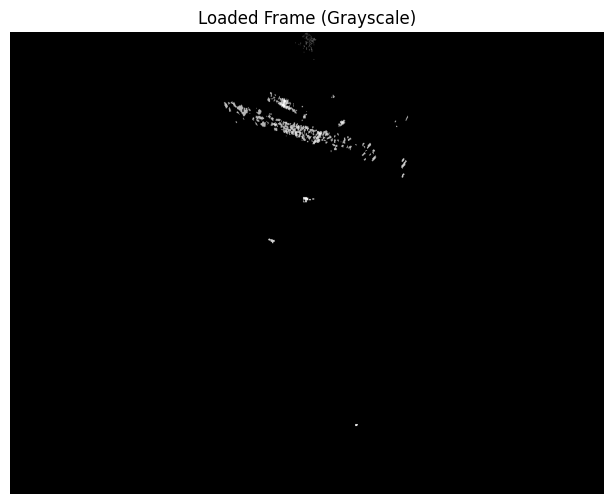

Image shape: (700, 900)
Image type: uint8
Value range: [0, 255]
Ready for CV2 processing!


In [3]:
# Load the saved frame (standard cv2)
img = cv2.imread('current_frame.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Display the frame
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title('Loaded Frame (Grayscale)')
plt.axis('off')
plt.show()

print(f"Image shape: {img.shape}")
print(f"Image type: {img.dtype}")
print(f"Value range: [{img.min()}, {img.max()}]")
print("Ready for CV2 processing!")

## Step 3: Basic CV2 Operations

Now let's apply some basic OpenCV operations:

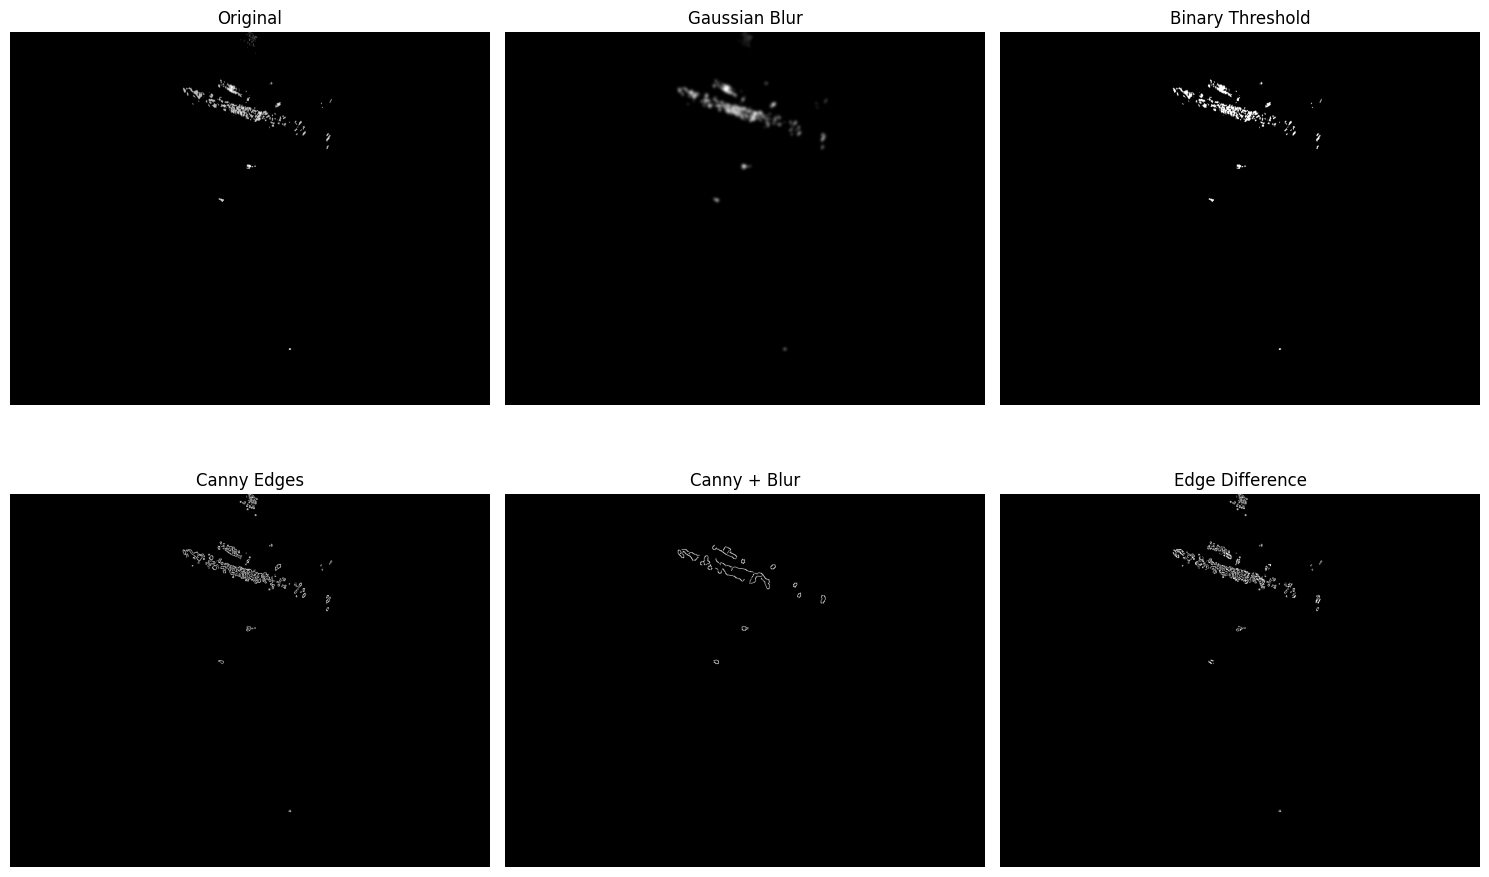

In [4]:
# Refactored: Use utility function for basic image processing pipeline
from utils import image_analysis_utils as iau
results = iau.basic_image_processing_pipeline(img, show=True)
blurred = results['blurred']
edges = results['edges']
edges_blurred = results['edges_blurred']
thresh = results['thresh']
diff = results['diff']

In [5]:
# ==================== EASY CONFIGURATION SECTION ====================
# Change these settings to experiment with different image processing parameters


# ==================== CREATE VIDEO WITH CURRENT SETTINGS ====================

# Create the video with easy-to-modify settings
video_path = iau.create_contour_detection_video(
    npz_file_index=4,          # Which NPZ file to use
    frame_start=1,           # Starting frame
    frame_count=1000,           # How many frames to process
    frame_step=1,              # Step between frames (every 3rd frame)
    output_path='exports/contour_detection_configurable.mp4'
)

=== CONTOUR DETECTION VIDEO CREATION ===
Creating video with 1000 frames, stepping by 1...
  Image Processing: MOMENTUM MERGING (radius=3, threshold=0.1, decay=0.9), canny=(40, 120), min_area=100
  Tracking: boost=1000.0x, expansion=10px
  Video: fps=15, show_contours=True, show_ellipse=True


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:131: RuntimeWarning: invalid value encountered in cast
  return (np.clip(frame01, 0, 1) * 255).astype(np.uint8)


Processing frames...
Processed 10/698 frames
Processed 20/698 frames
Processed 30/698 frames
Processed 20/698 frames
Processed 30/698 frames
Processed 40/698 frames
Processed 50/698 frames
Processed 40/698 frames
Processed 50/698 frames
Processed 60/698 frames
Processed 70/698 frames
Processed 60/698 frames
Processed 70/698 frames
Processed 80/698 frames
Processed 90/698 frames
Processed 80/698 frames
Processed 90/698 frames
Processed 100/698 frames
Processed 110/698 frames
Processed 100/698 frames
Processed 110/698 frames
Processed 120/698 frames
Processed 130/698 frames
Processed 120/698 frames
Processed 130/698 frames
Processed 140/698 frames
Processed 150/698 frames
Processed 140/698 frames
Processed 150/698 frames
Processed 160/698 frames
Processed 170/698 frames
Processed 160/698 frames
Processed 170/698 frames
Processed 180/698 frames
Processed 190/698 frames
Processed 180/698 frames
Processed 190/698 frames
Processed 200/698 frames
Processed 210/698 frames
Processed 200/698 fra

## Step 6: Red Line Distance Analysis Over Time

Now let's perform a comprehensive analysis of the red line distance over time. The red line represents the major axis of the detected elongated contour (likely a fishing net), and we'll track how this distance changes throughout the video sequence.

In [6]:
# Analyze the red line distance over time
distance_results = iau.analyze_red_line_distance_over_time(
    npz_file_index=0,     # Same file as the video
    frame_start=1,        # Start from frame 1
    frame_count=698,      # Analyze all frames from the video
    frame_step=1          # Every frame
)

=== RED LINE DISTANCE ANALYSIS OVER TIME ===
Analyzing: exports/outputs/2024-08-22_14-06-43_data_cones.npz
Total frames available: 592
Analyzing frames 1 to 592 (step=1)
Total frames available: 592
Analyzing frames 1 to 592 (step=1)


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:131: RuntimeWarning: invalid value encountered in cast
  return (np.clip(frame01, 0, 1) * 255).astype(np.uint8)


  Processed 50/591 frames (Success rate: 100.0%)
  Processed 100/591 frames (Success rate: 100.0%)
  Processed 100/591 frames (Success rate: 100.0%)
  Processed 150/591 frames (Success rate: 100.0%)
  Processed 150/591 frames (Success rate: 100.0%)
  Processed 200/591 frames (Success rate: 100.0%)
  Processed 200/591 frames (Success rate: 100.0%)
  Processed 250/591 frames (Success rate: 100.0%)
  Processed 250/591 frames (Success rate: 100.0%)
  Processed 300/591 frames (Success rate: 100.0%)
  Processed 300/591 frames (Success rate: 100.0%)
  Processed 350/591 frames (Success rate: 100.0%)
  Processed 350/591 frames (Success rate: 100.0%)
  Processed 400/591 frames (Success rate: 100.0%)
  Processed 400/591 frames (Success rate: 100.0%)
  Processed 450/591 frames (Success rate: 100.0%)
  Processed 450/591 frames (Success rate: 100.0%)
  Processed 500/591 frames (Success rate: 100.0%)
  Processed 500/591 frames (Success rate: 100.0%)
  Processed 550/591 frames (Success rate: 100.0%)
 

## Step 7: Convert to Real-World Distances

Now let's convert the pixel distances to real-world distances using the fact that the entire sonar image represents a 10x10 meter area.

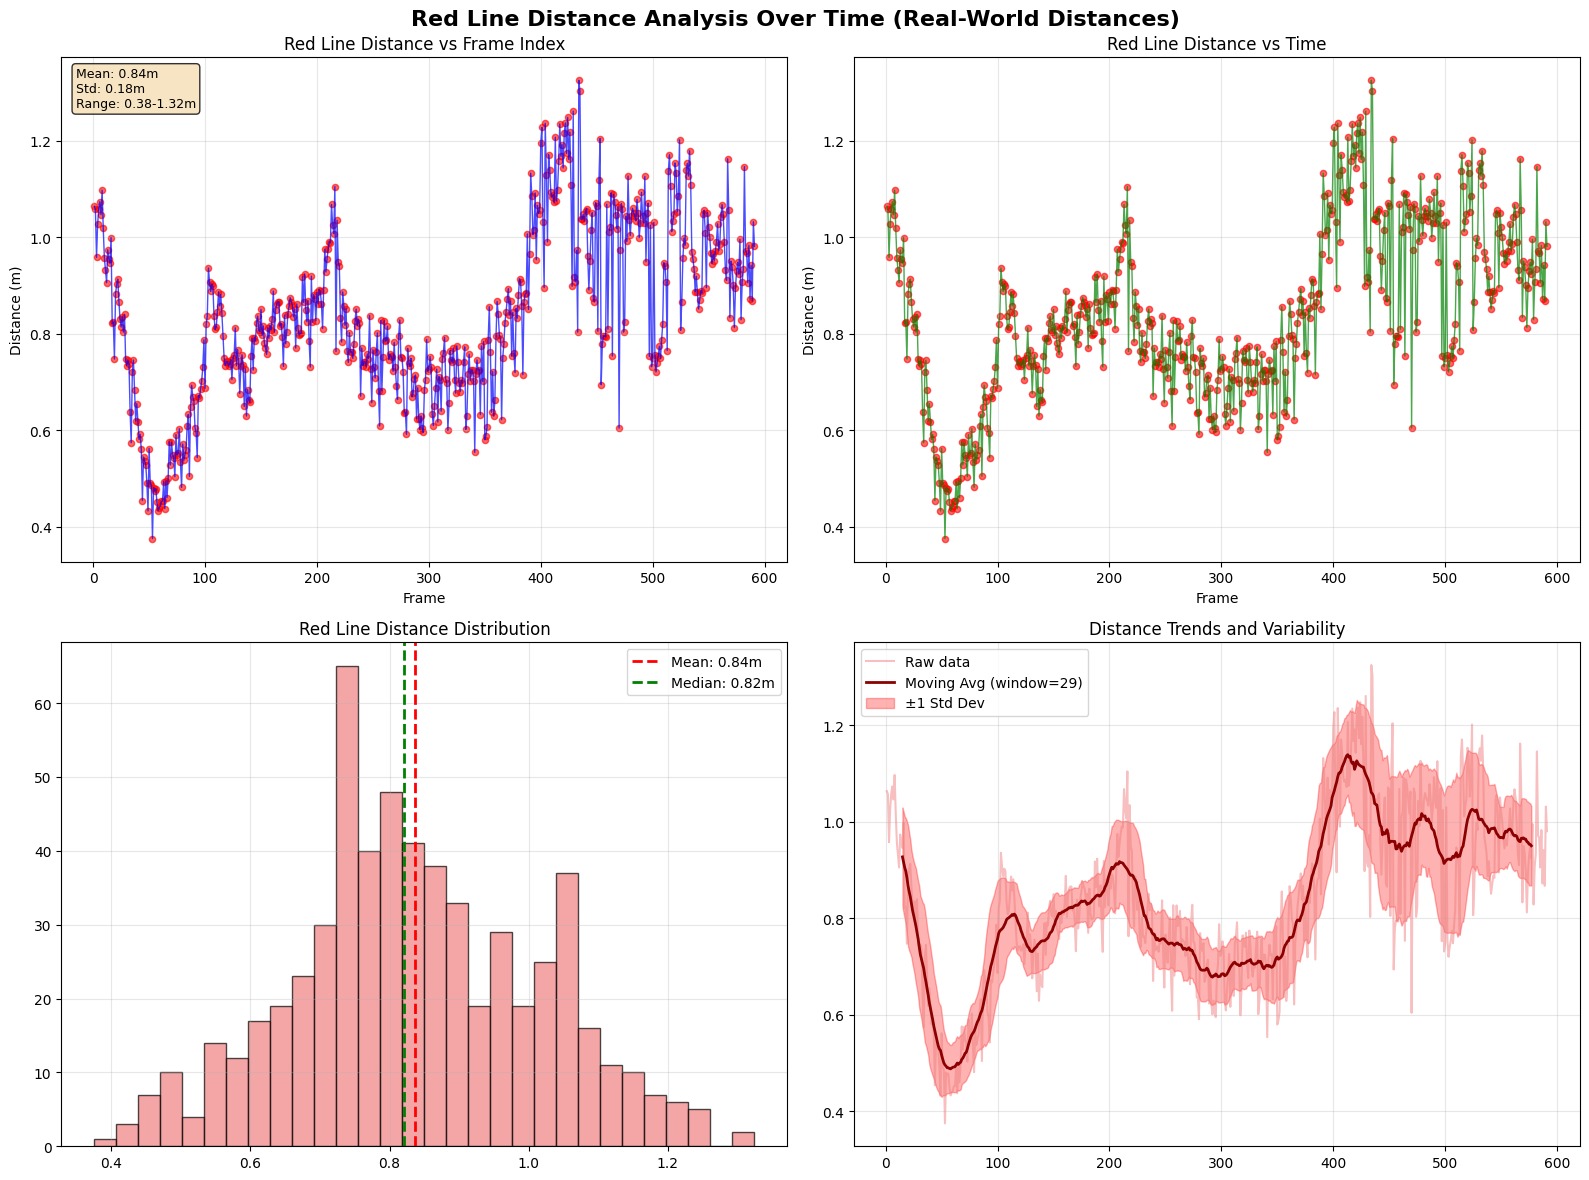

In [7]:
# Real-world distance analysis and plotting using utility function
image_shape = (700, 900)  # Update if your image size is different
sonar_coverage_meters = 5.0  # Update if your sonar coverage is different
iau.plot_real_world_distance_analysis(distance_results, image_shape=image_shape, sonar_coverage_meters=sonar_coverage_meters)

## Step 8: Timestamp Analysis

Let's examine the timestamps in detail and create time-based analysis of the fishing net distance.

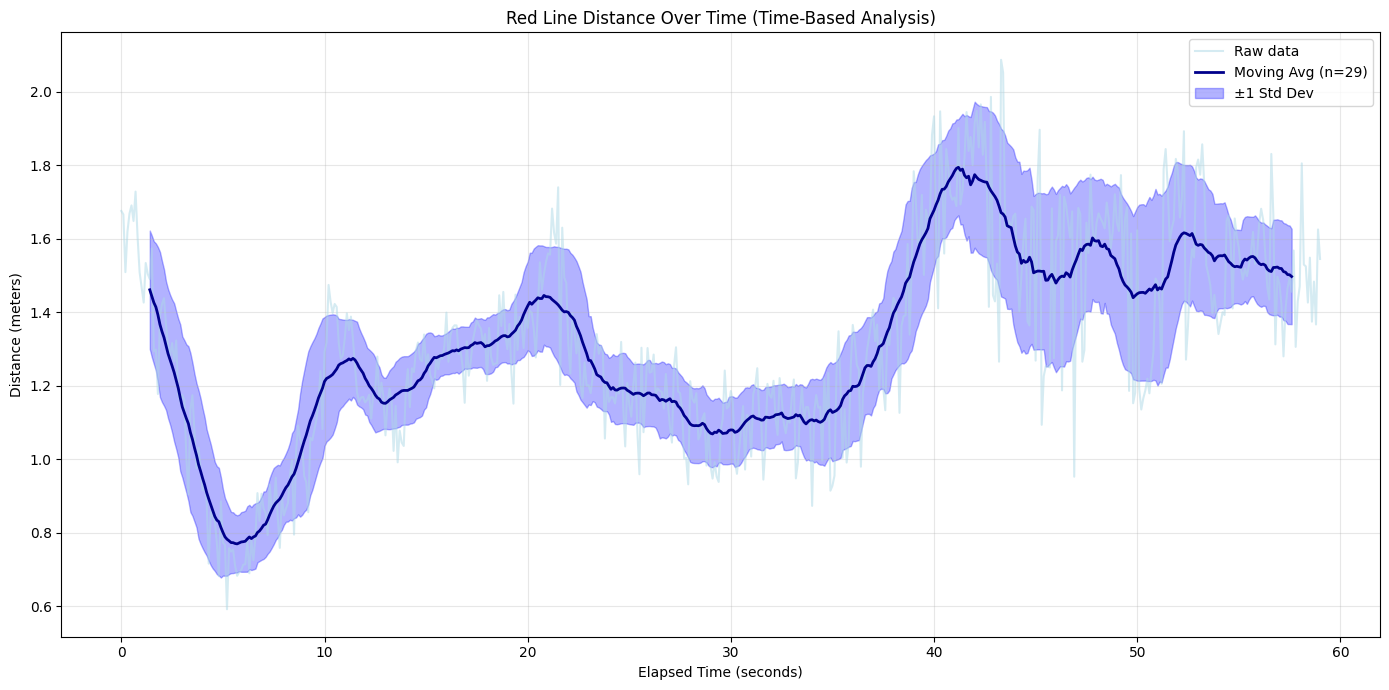

In [8]:
# Plot time-based analysis using utility function
pixels_to_meters_avg = 0.01  # Example conversion factor, update as needed
iau.plot_time_based_analysis(distance_results, pixels_to_meters_avg=pixels_to_meters_avg, estimated_fps=10)

In [9]:
# 🔄 COMPARISON: SONAR vs DVL DISTANCE MEASUREMENTS
# =================================================
import utils.sonar_distance_analysis as sda

# Set target bag for comparison
TARGET_BAG = "2024-08-22_14-29-05"  # Use same bag as our sonar analysis
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 LOADING DVL DATA FOR COMPARISON: {TARGET_BAG}")
print("=" * 60)

# Load all distance data for the target bag
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Display what we loaded
print(f"\n📊 RAW DATA LOADED:")
for key, data in raw_data.items():
    if data is not None:
        print(f"   ✅ {key}: {len(data)} records")
    else:
        print(f"   ❌ {key}: None")

print(f"\n📏 DISTANCE MEASUREMENTS LOADED:")
for key, info in distance_measurements.items():
    data_len = len(info['data'])
    print(f"   ✅ {key}: {data_len} records - {info['description']}")

🎯 LOADING DVL DATA FOR COMPARISON: 2024-08-22_14-29-05
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-29-05
📡 1. Loading Navigation Data...
   ✅ Loaded 525 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 518 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ✅ Loaded 31 DVL altimeter records
📡 4. Loading USBL...
   ✅ Loaded 29 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 284 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 269 navigation position records
📡 7. Loading INS Z Position...
   ✅ Loaded 562 INS records with positionFrame.z

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-22_14-29-05
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 6

📊 RAW DATA LOADED:
   ✅ navigation: 525 records
   ✅ guidance: 518 records

📏 DISTANCE MEASUREMENTS LOADED:
   ✅ DVL_Altimeter: 31 records - Distance to seafloor
   ✅ USBL_3D: 29 records - 3D acoustic position
   ✅ USBL_Depth: 29 

/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:159: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sv = savgol_filter(x.fillna(method='ffill').fillna(method='bfill').to_numpy(), win, polyorder)
/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:166: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gs = uniform_filter1d(x.fillna(method='ffill').fillna(method='bfill').to_numpy(),
/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:667: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from 

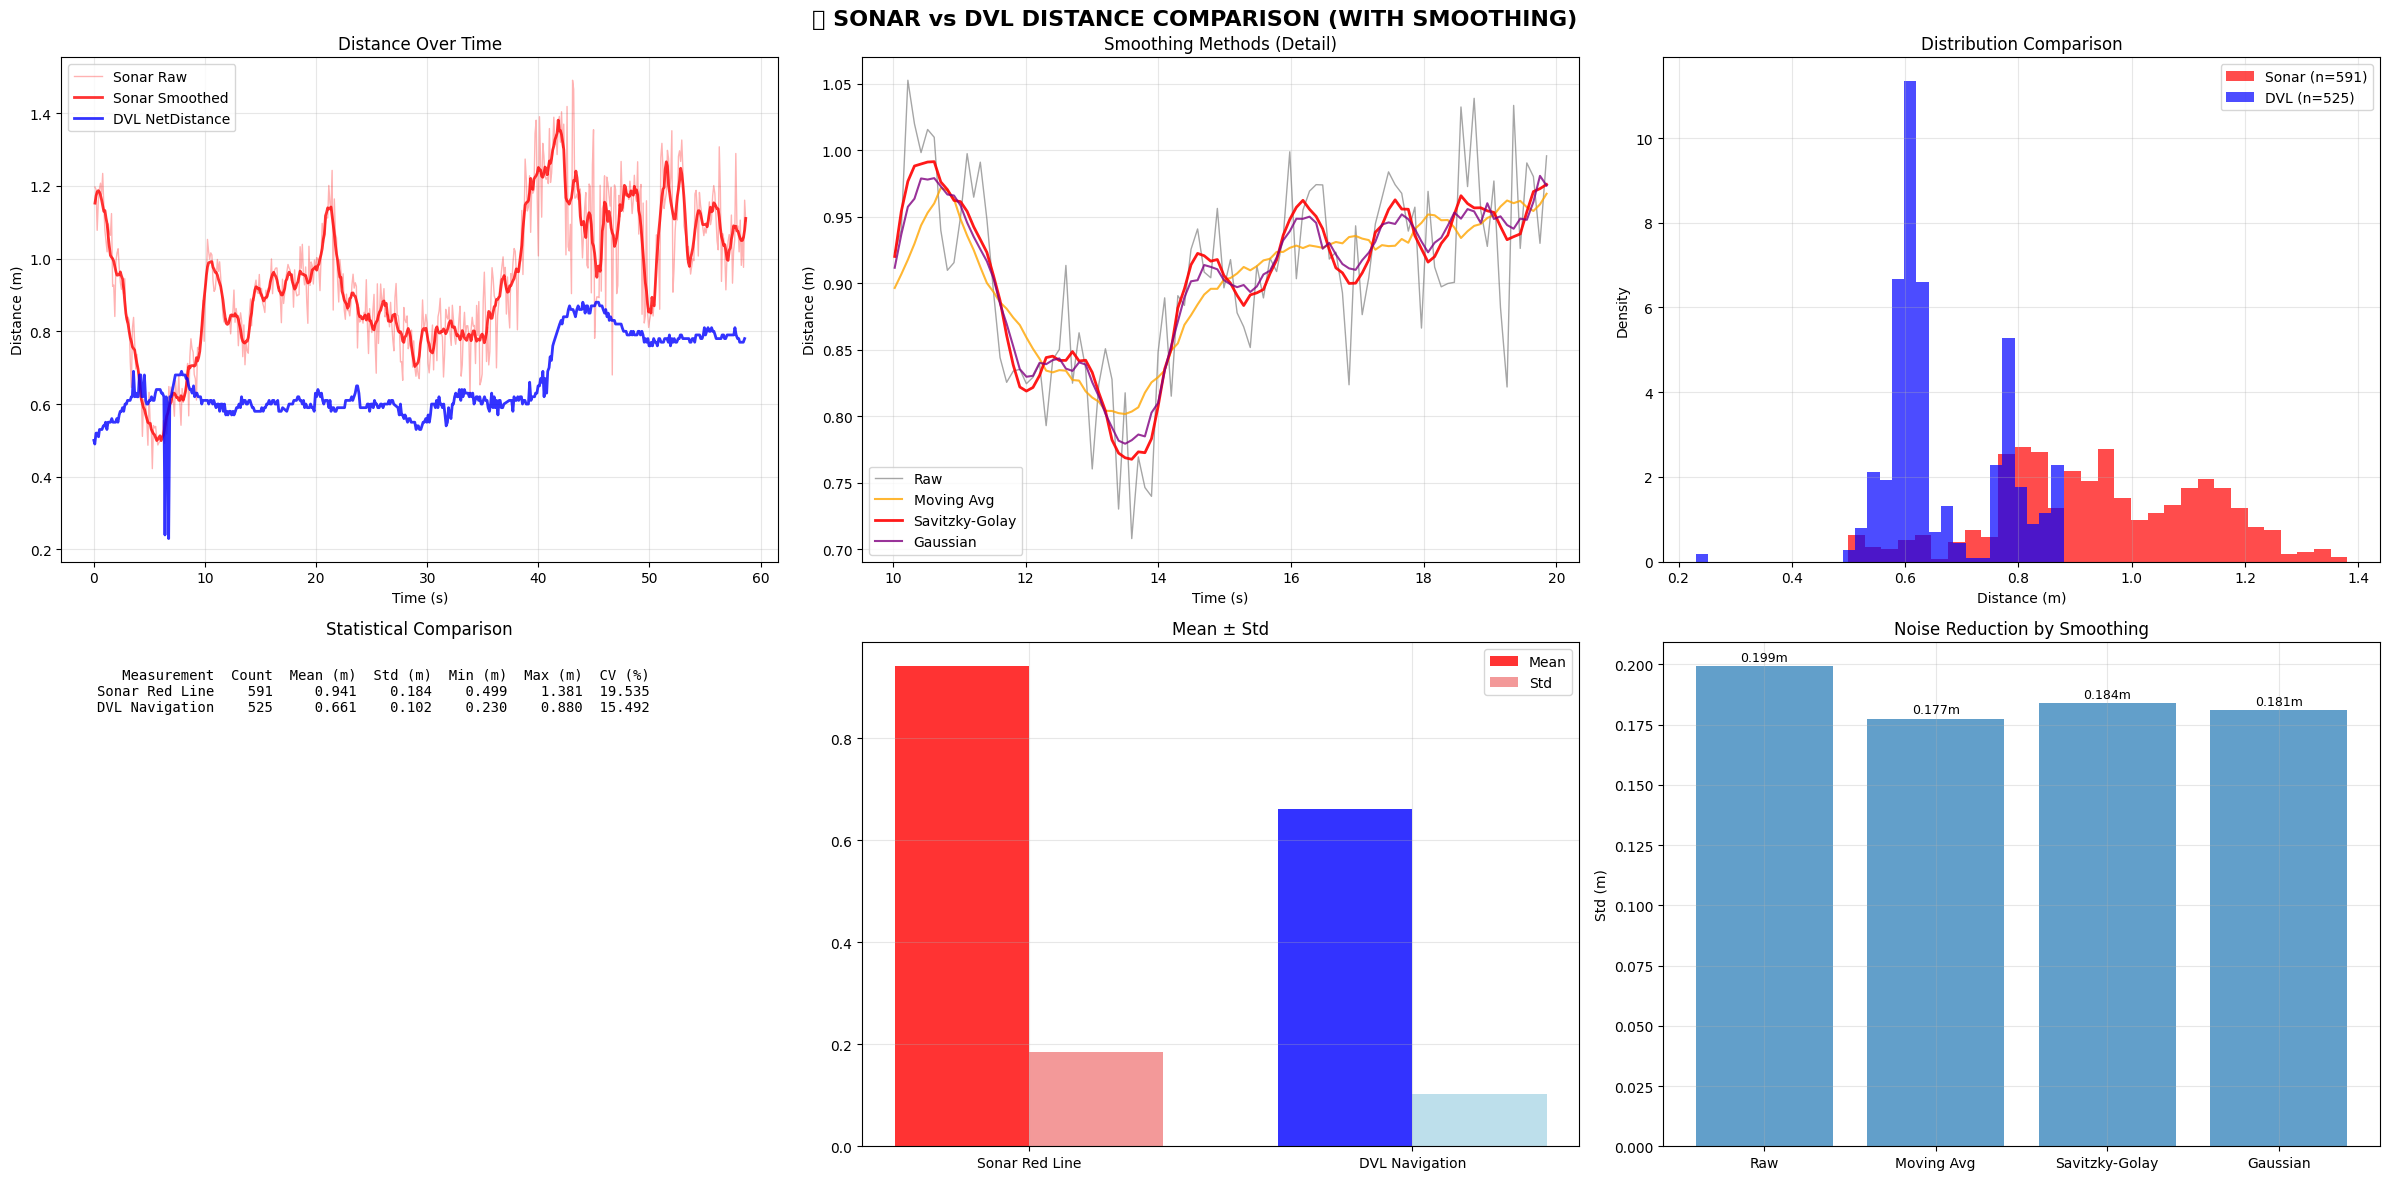


📊 DETAILED COMPARISON STATISTICS:
   Measurement  Count  Mean (m)  Std (m)  Min (m)  Max (m)  CV (%)
Sonar Red Line    591     0.941    0.184    0.499    1.381  19.535
DVL Navigation    525     0.661    0.102    0.230    0.880  15.492

🔍 SCALE ANALYSIS:
   Sonar mean: 0.941 m
   DVL mean:   0.661 m
   Scale ratio (Sonar/DVL): 1.424x

⏱️ TIME ANALYSIS:
   Sonar duration (stretched): 58.7s (591 frames)
   DVL duration:               58.6s (525 records)
   ✅ Temporal alignment: Both now span ~58.6s

Comparison stats summary:
{'dvl_duration_s': 58.563822031,
 'dvl_mean_m': 0.6609714289506277,
 'scale_ratio': 1.4237929583595708,
 'sonar_duration_stretched_s': 58.663082746306785,
 'sonar_mean_m': 0.941086466216767}


In [10]:
try:
    sonar_coverage_m = 5.0  # meters (adjust if needed)
    sonar_image_size = 700  # pixels (height used in sonar grid)
    fig, comparison_stats = iau.detailed_sonar_dvl_comparison(distance_results, raw_data, sonar_coverage_m=sonar_coverage_m, sonar_image_size=sonar_image_size, window_size=15)
    if comparison_stats and isinstance(comparison_stats, dict) and 'error' in comparison_stats:
        print('Comparison did not run:', comparison_stats['error'])
    else:
        print('\nComparison stats summary:')
        from pprint import pprint
        pprint(comparison_stats)
except Exception as e:
    print('Error running detailed comparison:', e)